<a href="https://colab.research.google.com/github/pastal24/rep/blob/master/LSTM_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import pickle
import pandas as pd
import numpy as np
objects={}

infile = open(r"/content/gdrive/My Drive/GdataML1.pickle",'rb')
objects = pickle.load(infile, encoding='latin1')



In [ ]:
objects.keys()

dict_keys(['y', 'X_flight', 'ids', 'X_hold', 'time'])

In [ ]:
npa = np.asarray([objects['X_flight'],objects['X_hold']])
npa.shape
npa=npa.swapaxes(0,1)
npa.shape

# df=pd.DataFrame(objects['X_hold'])
# df.shape
# npa2=np.asarray(df)
# npa2.shape

# df1=pd.DataFrame(objects['X_flight'])
# df1.shape
# npa3=np.asarray(df1)
# npa3.shape
# npa=np.dstack((npa2,npa3))
# npa.shape
# npa=np.nan_to_num(npa)
# npa.shape
npa=npa.swapaxes(1,2)
npa.shape

(19055, 100, 2)

In [ ]:
x_train,x_test = npa[:17000,:,:],npa[17000:,:,:]
x_train.shape
x_train.shape
x_test.shape
x_test=x_test[:2050,:,:]
x_test.shape[1:]


(100, 2)

In [ ]:
# x_train = x_train.reshape(-1, 2, 100, 1)
# x_test = x_test.reshape(-1, 2, 100, 1)

# x_test.shape[1:]

(2, 100, 1)

In [ ]:
from tensorflow.keras.layers import Input,Activation, Dense, TimeDistributed, MaxPooling2D, UpSampling2D , Flatten ,Reshape ,Dropout,LSTM,RepeatVector
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras import backend as K
import tensorflow

In [ ]:
model = Sequential()
model.add(LSTM(32, input_shape= (100,2), return_sequences=True ))
model.add(LSTM(16, return_sequences=False ))
#model.add(LSTM(8,return_sequences=False))
model.add(RepeatVector(x_train.shape[1]))
#model.add(LSTM(8,return_sequences=True,stateful=False))
model.add(LSTM(16, return_sequences=True ))

model.add(LSTM(32, return_sequences=True))


model.add(TimeDistributed(Dense(x_train.shape[2],activation='linear')))

opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01,decay=0.0001)
model.compile(optimizer='Adam',loss='mse',metrics=['mae'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 100, 32)           4480      
_________________________________________________________________
lstm_21 (LSTM)               (None, 16)                3136      
_________________________________________________________________
repeat_vector_5 (RepeatVecto (None, 100, 16)           0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 100, 16)           2112      
_________________________________________________________________
lstm_23 (LSTM)               (None, 100, 32)           6272      
_________________________________________________________________
time_distributed_5 (TimeDist (None, 100, 2)            66        
Total params: 16,066
Trainable params: 16,066
Non-trainable params: 0
__________________________________________________

In [ ]:
history=model.fit(x_train, x_train,
                epochs=200,
                batch_size=256, verbose=1,
                 validation_data=(x_test, x_test))

Epoch 1/200
67/67 [==============================] - 7s 110ms/step - loss: 0.0343 - mae: 0.0811 - val_loss: 0.0210 - val_mae: 0.0611
Epoch 2/200
67/67 [==============================] - 6s 90ms/step - loss: 0.0302 - mae: 0.0697 - val_loss: 0.0201 - val_mae: 0.0584
Epoch 3/200
67/67 [==============================] - 6s 90ms/step - loss: 0.0286 - mae: 0.0647 - val_loss: 0.0187 - val_mae: 0.0538
Epoch 4/200
67/67 [==============================] - 6s 90ms/step - loss: 0.0275 - mae: 0.0617 - val_loss: 0.0182 - val_mae: 0.0547
Epoch 5/200
67/67 [==============================] - 6s 91ms/step - loss: 0.0270 - mae: 0.0605 - val_loss: 0.0177 - val_mae: 0.0535
Epoch 6/200
67/67 [==============================] - 6s 90ms/step - loss: 0.0265 - mae: 0.0588 - val_loss: 0.0174 - val_mae: 0.0529
Epoch 7/200
67/67 [==============================] - 6s 90ms/step - loss: 0.0263 - mae: 0.0574 - val_loss: 0.0176 - val_mae: 0.0515
Epoch 8/200
67/67 [==============================] - 6s 91ms/step - loss: 0

KeyboardInterrupt: ignored

In [ ]:
y = model.predict(x_test, verbose=0)
print('---Predicted---')
print(np.round(y[0][1],3))
print('---Actual---')
print(np.round(x_test[0][1], 3))

---Predicted---
[0.017 0.002]
---Actual---
[0. 0.]


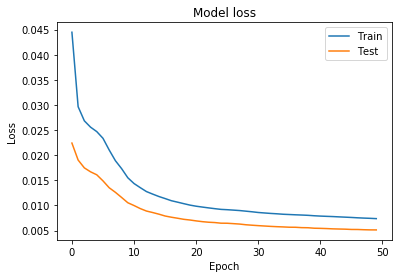

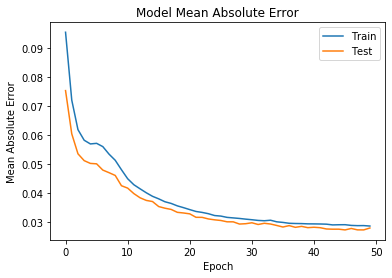

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
#plt.figure(figsize=(26.5,15),dpi=100)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.savefig('C:\\Users\\pastal24\\Desktop\\thesis\\loss_LSTM_input100.jpeg')
plt.show()

#plt.figure(figsize=(26.5,15),dpi=100)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.savefig('C:\\Users\\pastal24\\Desktop\\thesis\\maeLSTM_input100.jpeg')
plt.show()

In [ ]:
import json
from tensorflow.keras.models import model_from_json


In [ ]:
model_json = model.to_json()
with open("C:\\Users\\pastal24\\Desktop\\thesis\\autoencoders\\LSTM100.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("LSTM100.h5")
print("Saved model to disk")

Saved model to disk
